## Contents
* [1. EDA for Weather Data](#1.EDA-for-Weather-Data)
* [2. Read & Clean Data](#2.-Read-&-Clean-Data)
* [3. EDA - Ordinary Least Squares](#3.-EDA---Ordinary-Least-Squares)
* [4. EDA - Multicollinearity](#4.-EDA---Multicollinearity)
* [5. EDA - Trends over Time](#5.-EDA---Trends-over-Time)

---
## 1. EDA for Weather Data
---
- This notebook will explore and analyse (if any) the characteristics of and trends within the Singapore weather data.
- Data is extracted from [Data.gov (rain)](https://data.gov.sg/dataset/rainfall-monthly-number-of-rain-days), [(sunshine)](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration), [(temperature)](https://data.gov.sg/dataset/surface-air-temperature-monthly-mean), [(humidity)](https://data.gov.sg/dataset/relative-humidity-monthly-mean).

---
## 2. Read & Clean Data
---

In [2]:
#importing necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [3]:
#importing weather dataset 

df = pd.read_csv('./data/input/weather_csv.csv')

In [3]:
#change date column to pandas datatime series and drop original data column

df['date'] = pd.to_datetime(df['Date'])
df = df.drop(columns=['Date'])

In [4]:
#feature engineering: extract the year and month into individual columns

df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,mean_temp,no_rain_day,mean_humidity,mean_sunshine_hour,normal_dengue,dhf,dengue_total,date,year,month
0,27.1,15,82.1,6.0,979,5,984,2013-01-01,2013,1
1,26.5,22,86.9,4.0,1109,5,1114,2013-02-01,2013,2
2,28.3,10,80.4,7.5,1600,10,1610,2013-03-01,2013,3
3,28.2,19,82.7,5.2,2079,7,2086,2013-04-01,2013,4
4,28.2,17,83.1,5.4,2546,9,2555,2013-05-01,2013,5


---
## 3. EDA - Ordinary Least Squares
---

In [5]:
#determine which feature is significant/has statistical correlation via OLS

X = df[['mean_temp', 'no_rain_day', 'mean_humidity','mean_sunshine_hour']]
y = df['dengue_total']

X = sm.add_constant(X, prepend=True)
results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dengue_total   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     2.163
Date:                Wed, 08 Feb 2023   Prob (F-statistic):             0.0776
Time:                        19:35:03   Log-Likelihood:                -1027.7
No. Observations:                 120   AIC:                             2065.
Df Residuals:                     115   BIC:                             2079.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6292.8841   8736.848     -0.720      0.473   -2.36e+04     1.1e+04
mean_temp            416.3074    206.436      2.017      0.046       7.398     825.217
no_rain_day           17.2763     34.516      0.501      0.618     -51.093      85.645
mean_humidity        -42.7328     56.628     -0.755      0.452    -154.903      69.437
mean_sunshine_hour  -156.3690    142.377     -1.098      0.274    -438.391     125.653
==============================================================================
Omnibus:                       62.401   Durbin-Watson:                   0.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.161
Skew:                           1.992   Prob(JB):                     1.14e-42
Kurtosis:                       7.770   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Note**:

- The only feature which is statistically significant is "mean_temp" as p-value is <0.05

---
## 4. EDA - Multicollinearity
---

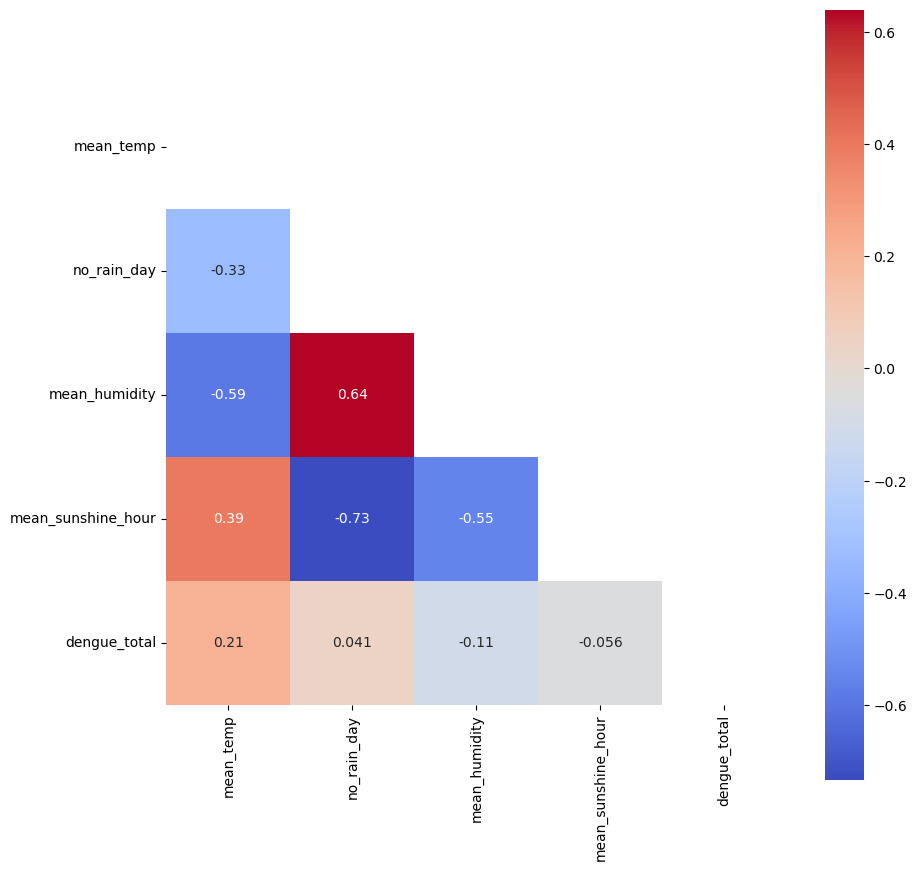

In [6]:
#determine which features display multi-colinearity

plt.figure(figsize=(10,10))
corr = df[['mean_temp', 'no_rain_day', 'mean_humidity','mean_sunshine_hour', 'dengue_total']].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot = True, cmap='coolwarm', square=True);

**Note**:

- No feature is found to be strongly posititvely/negatively correlated to dengue_total

- Decided to explore temperature v.s. dengue cases further as it has a p-value <0.05 in OLS

- Decided to explore rainfall pattern v.s. dengue cases further too as external research shows that frequent rainfall count increase number of mosquitoes due to increase in breeding ground

---
## 5. EDA - Trends over Time
---

In [7]:
#group entries with similiar month or year together for feature "number of rainy days"

avg_rain_day_year = df.groupby('year')[['no_rain_day']].mean()
avg_rain_day_year.columns = ['yearly_total_rain_day']

avg_rain_day_month = df.groupby('month')[['no_rain_day']].mean()
avg_rain_day_month.columns = ['monthly_total_rain_day']

In [8]:
#group entries with similiar month or year together for feature "mean temp"

avg_temp_year = df.groupby('year')[['mean_temp']].mean()
avg_temp_year.columns = ['yearly_total_temp_day']

avg_temp_month = df.groupby('month')[['mean_temp']].mean()
avg_temp_month.columns = ['monthly_total_temp_day']

In [9]:
#group entries with similiar month or year together for feature "total_dengue"

avg_dengue_year = df.groupby('year')[['dengue_total']].mean()
avg_dengue_year.columns = ['avg_dengue_year']

avg_dengue_month = df.groupby('month')[['dengue_total']].mean()
avg_dengue_month.columns = ['avg_dengue_month']

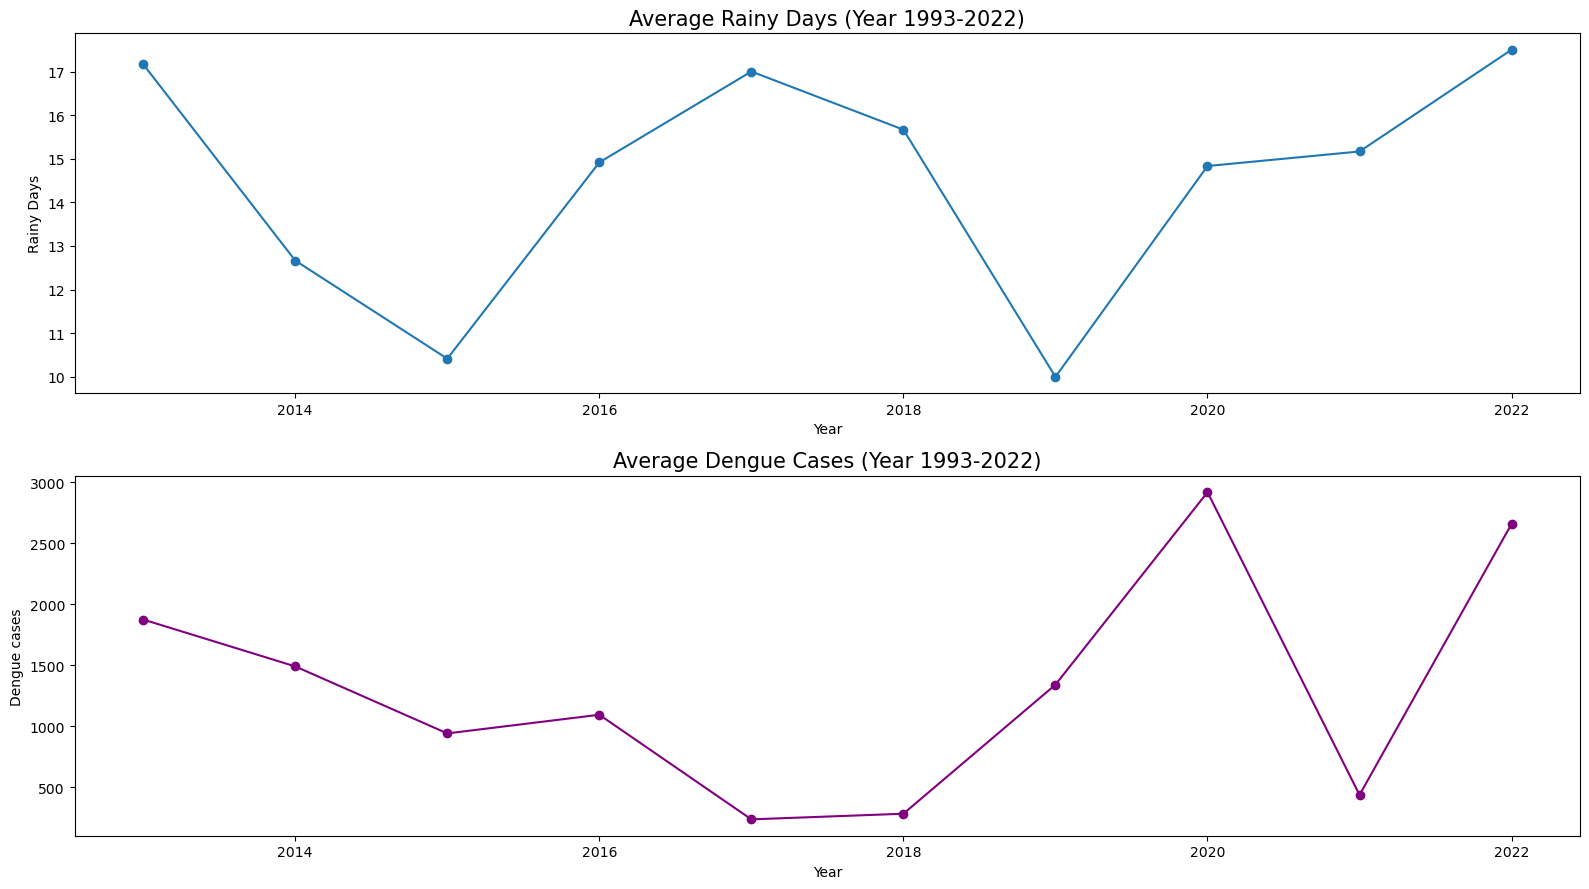

In [10]:
#plotting rain trend (by year) vs dengue trend

plt.figure(figsize = (16,9))

ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Average Rainy Days (Year 1993-2022)', fontsize =15)
ax1.plot(avg_rain_day_year.index, avg_rain_day_year.values, marker='o')
ax1.set_ylabel('Rainy Days')
ax1.set_xlabel('Year')

ax2 = plt.subplot(2, 1, 2)
ax2.set_title('Average Dengue Cases (Year 1993-2022)', fontsize =15)
ax2.plot(avg_dengue_year.index, avg_dengue_year.values, marker='o', color='purple');
ax2.set_ylabel('Dengue cases')
ax2.set_xlabel('Year')

plt.tight_layout()

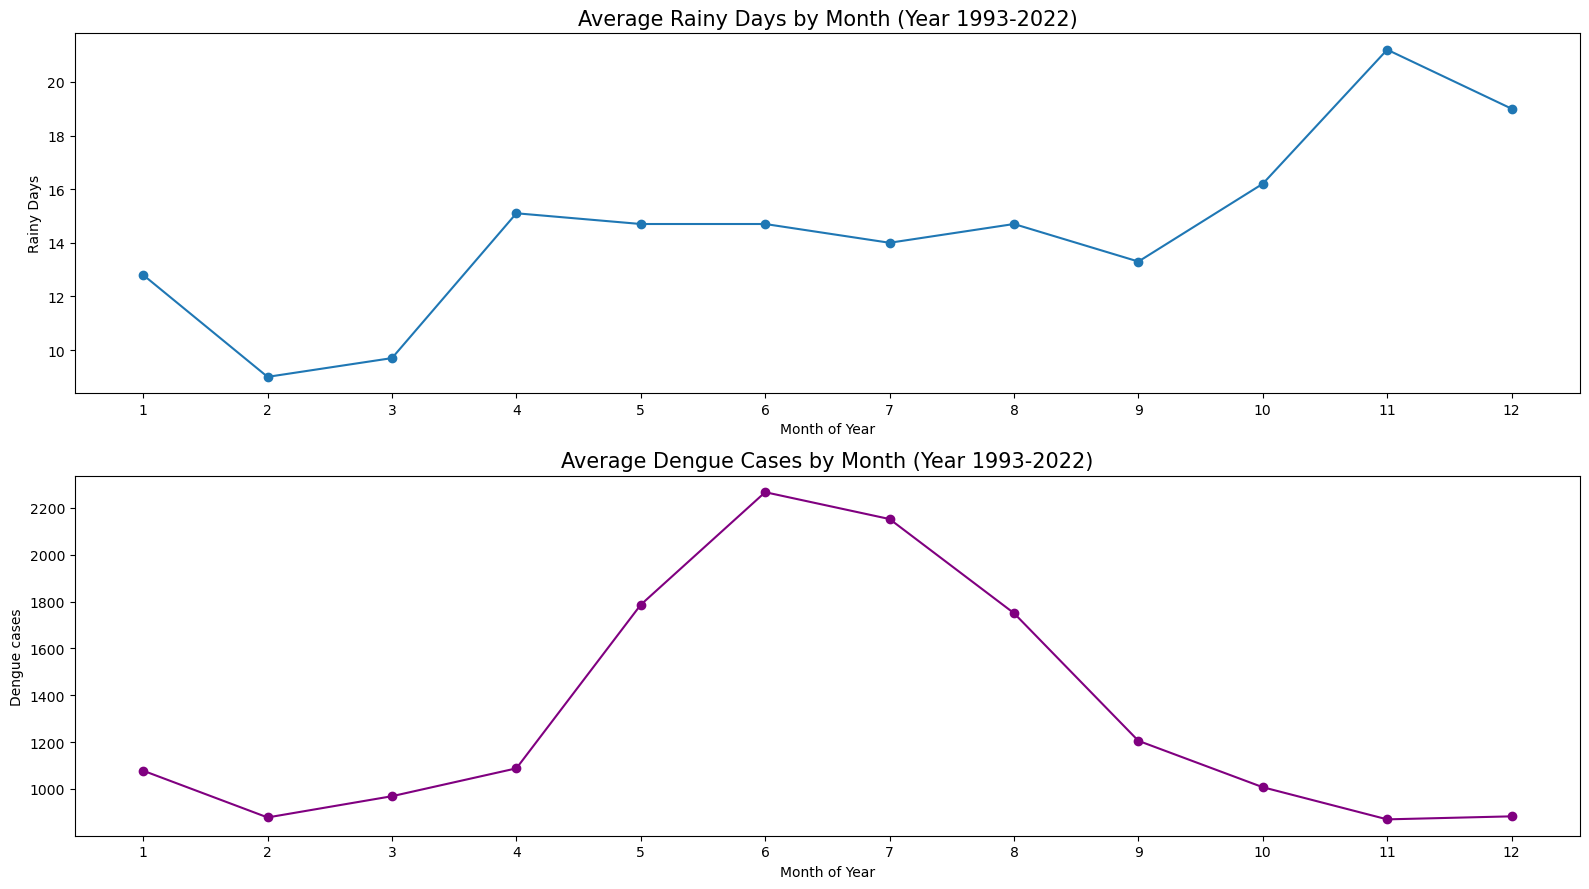

In [11]:
#plotting rain trend (by month) vs dengue trend

plt.figure(figsize = (16,9))

ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Average Rainy Days by Month (Year 1993-2022)', fontsize =15)
ax1.plot(avg_rain_day_month.index, avg_rain_day_month.values, marker='o')
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax1.set_ylabel('Rainy Days')
ax1.set_xlabel('Month of Year')

ax2 = plt.subplot(2, 1, 2)
ax2.set_title('Average Dengue Cases by Month (Year 1993-2022)', fontsize =15)
ax2.plot(avg_dengue_month.index, avg_dengue_month.values, marker='o', color='purple')
ax2.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax2.set_ylabel('Dengue cases')
ax2.set_xlabel('Month of Year')

plt.tight_layout()

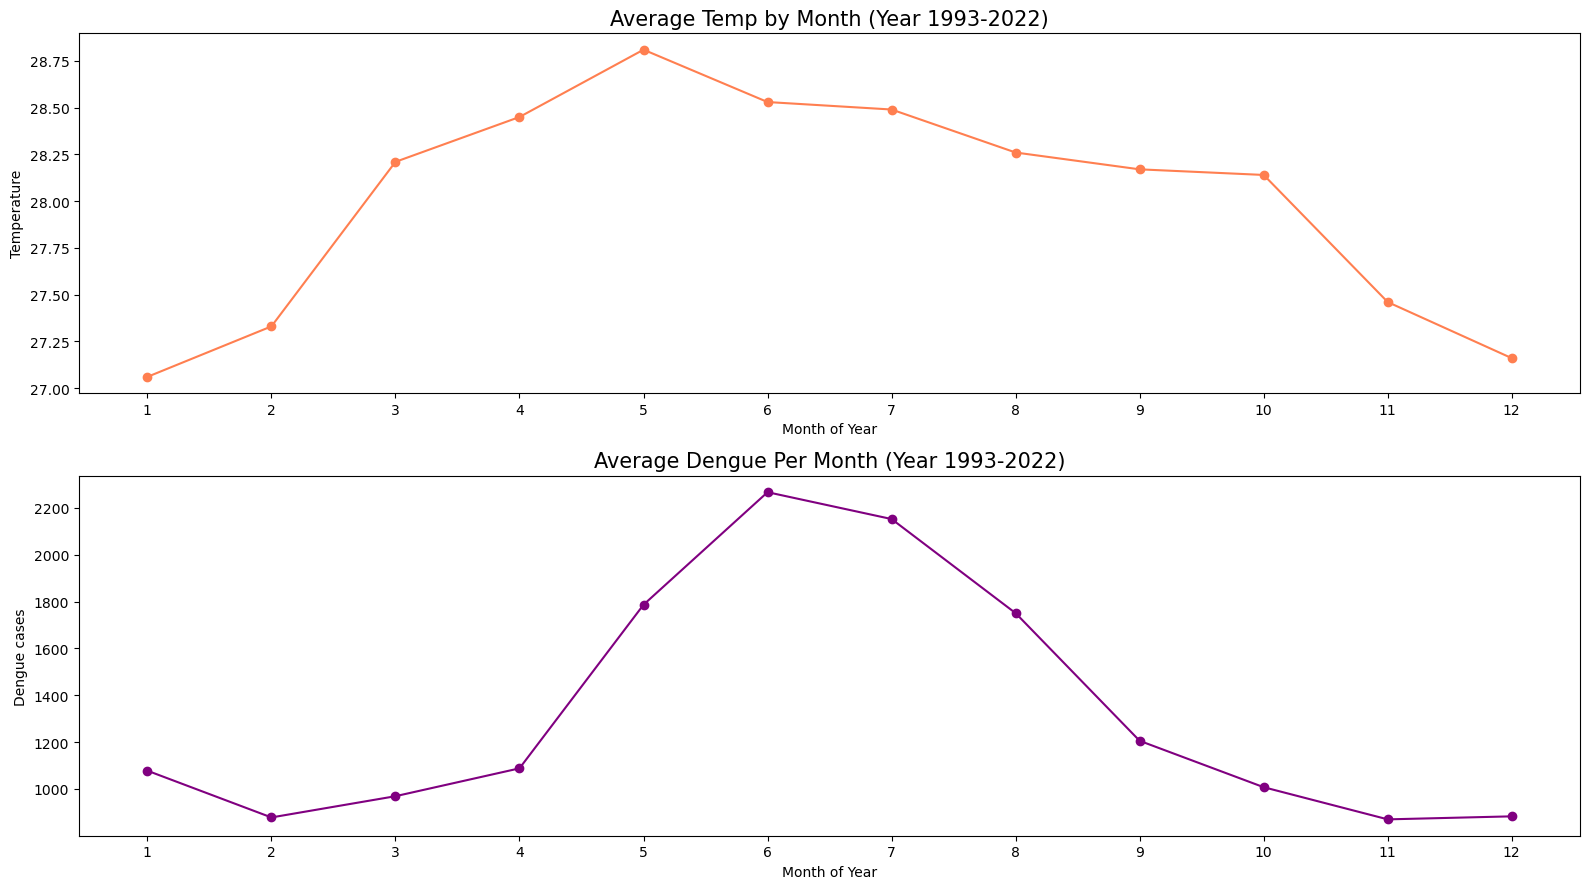

In [12]:
#plotting mean temperature (by month) vs dengue trend

plt.figure(figsize = (16,9))

ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Average Temp by Month (Year 1993-2022)', fontsize =15)
ax1.plot(avg_temp_month.index, avg_temp_month.values, marker='o',color='coral')
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax1.set_ylabel('Temperature')
ax1.set_xlabel('Month of Year')

ax2 = plt.subplot(2, 1, 2)
ax2.set_title('Average Dengue Per Month (Year 1993-2022)', fontsize =15)
ax2.plot(avg_dengue_month.index, avg_dengue_month.values, marker='o', color='purple')
ax2.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax2.set_ylabel('Dengue cases')
ax2.set_xlabel('Month of Year')

plt.tight_layout()

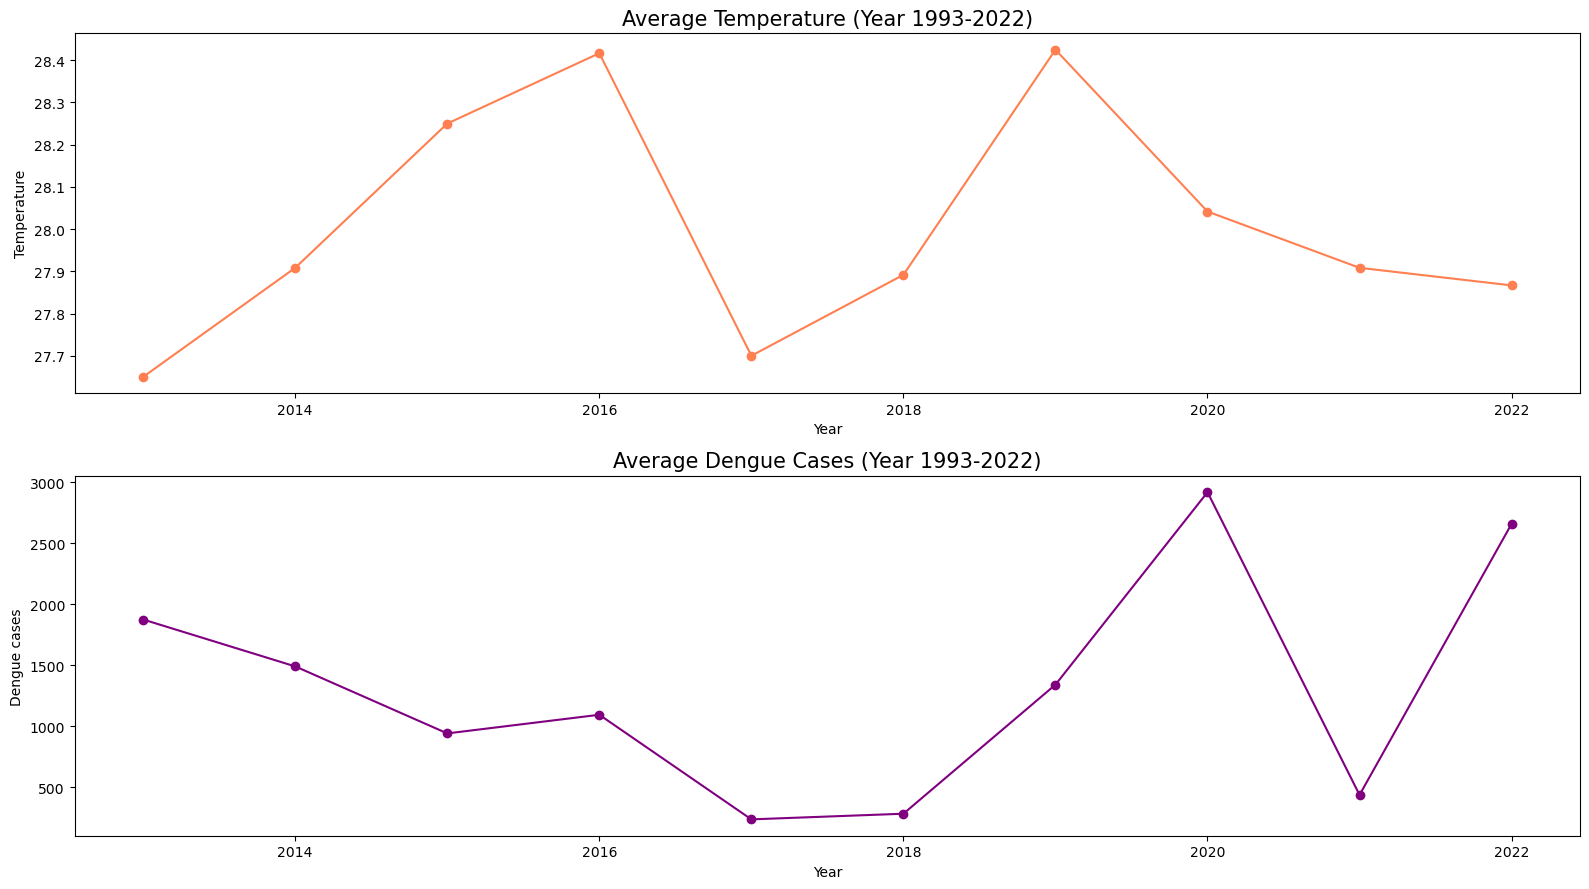

In [13]:
#plotting mean temperature (by year) vs dengue trend

plt.figure(figsize = (16,9))

ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Average Temperature (Year 1993-2022)', fontsize =15)
ax1.plot(avg_temp_year.index, avg_temp_year.values, marker='o', color='coral')
ax1.set_ylabel('Temperature')
ax1.set_xlabel('Year')

ax2 = plt.subplot(2, 1, 2)
ax2.set_title('Average Dengue Cases (Year 1993-2022)', fontsize =15)
ax2.plot(avg_dengue_year.index, avg_dengue_year.values, marker='o', color='purple')
ax2.set_ylabel('Dengue cases')
ax2.set_xlabel('Year')

plt.tight_layout()

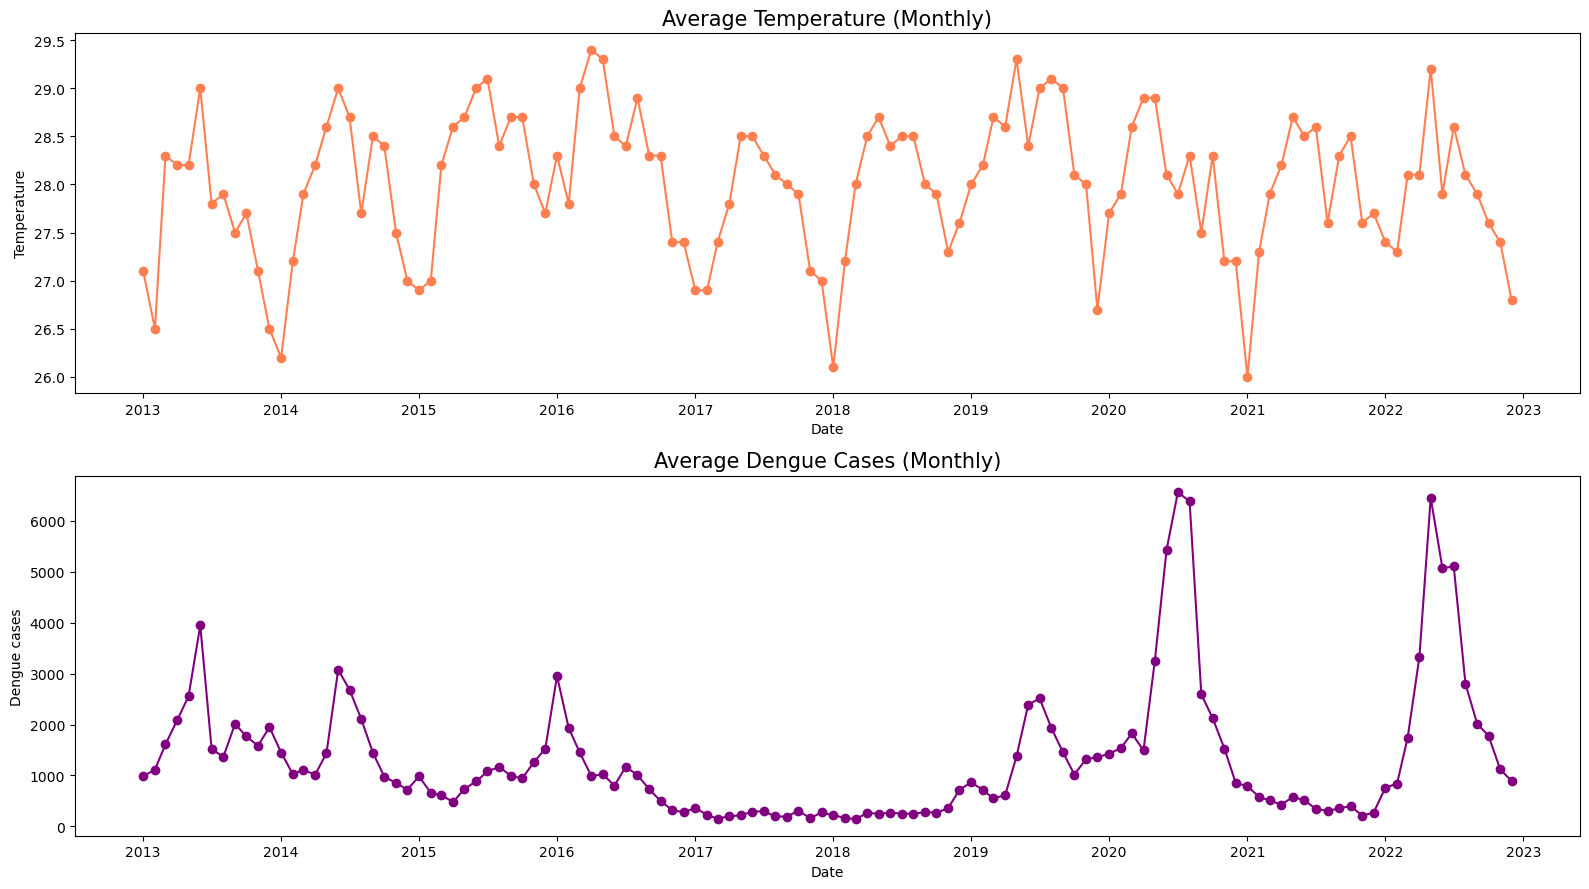

In [14]:
#plotting mean temperature (month-to-month) vs dengue trend

plt.figure(figsize = (16,9))

ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Average Temperature (Monthly)', fontsize =15)
ax1.plot(df['date'], df['mean_temp'], marker='o', color='coral')
ax1.set_ylabel('Temperature')
ax1.set_xlabel('Date')

ax2 = plt.subplot(2, 1, 2)
ax2.set_title('Average Dengue Cases (Monthly)', fontsize =15)
ax2.plot(df['date'], df['dengue_total'], marker='o', color='purple')
ax2.set_ylabel('Dengue cases')
ax2.set_xlabel('Date')

plt.tight_layout()

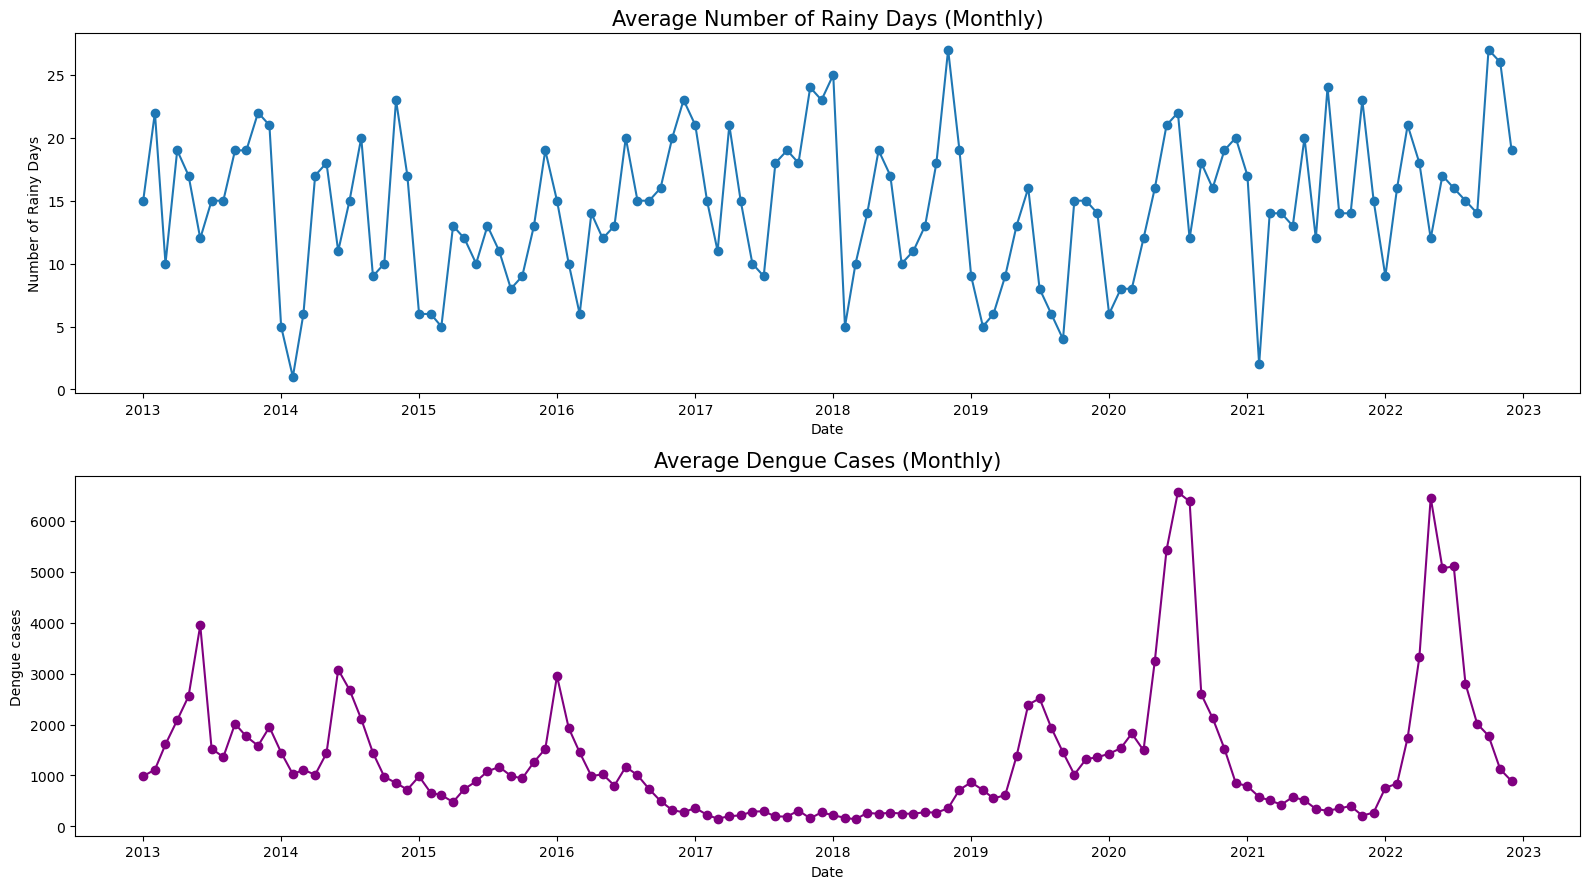

In [15]:
#plotting number of rainy days (month-to-month) vs dengue trend

plt.figure(figsize = (16,9))

ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Average Number of Rainy Days (Monthly)', fontsize =15)
ax1.plot(df['date'], df['no_rain_day'], marker='o')
ax1.set_ylabel('Number of Rainy Days')
ax1.set_xlabel('Date')

ax2 = plt.subplot(2, 1, 2)
ax2.set_title('Average Dengue Cases (Monthly)', fontsize =15)
ax2.plot(df['date'], df['dengue_total'], marker='o', color='purple')
ax2.set_ylabel('Dengue cases')
ax2.set_xlabel('Date')

plt.tight_layout()

**Note**:
    
- Graphs "mean_temp vs dengue (by month)" and "mean_temp vs dengue (by year)" found that dengue seem to have a similiar trend as mean_temp which explains the significant correlation in OLS (p<0.05)

- Did a more detailed plotting of month on month trend and found that the correlation between mean_temp and dengue is not that obvious now (perhaps explain the low correlation value in heatmap and 'high-yet-lower-than-0.05' p-value)

- Nothing much is found when graphs are plotted for "number of rainy days v.s. dengue" which explains the lack of correlation in OLS and Heatmap